In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import statistics
from scipy.stats import norm


In [7]:
df=pd.read_csv('Telco-Customer.csv')

In [8]:
df.tenure=pd.to_numeric(df.tenure,errors='coerce')
df.MonthlyCharges=pd.to_numeric(df.MonthlyCharges,errors='coerce')
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
#df.isnull().sum()
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [25]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [9]:
df.describe()#to extract the statistic data of all the columns

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


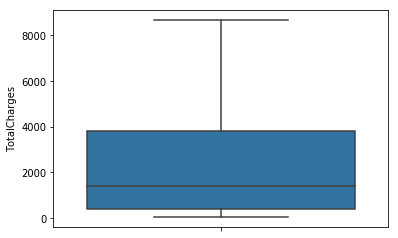

In [10]:
sns.boxplot(y='TotalCharges',data=df)
plt.show()#no outliers

In [11]:
data_mean, data_std=np.mean(df.TotalCharges),np.std(df.TotalCharges)
cut_off=data_std*3
lower,upper=data_mean-cut_off,data_mean+cut_off

In [12]:
#identify outliers
outliers=(x for x in df.TotalCharges if x<lower or x>upper)

In [13]:
median = df['TotalCharges'].median()

In [14]:
df.TotalCharges = df.TotalCharges.fillna(median)

In [15]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
#df.isnull().sum()
df.apply(lambda x: sum(x.isnull().values), axis = 0) # For columns

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [26]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [16]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


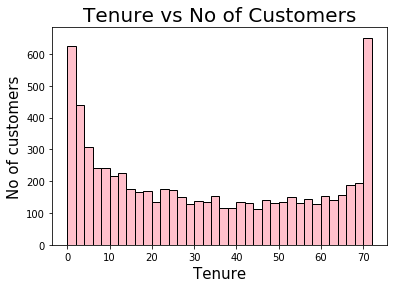

In [18]:
#INSIGHTS:
plt.hist(df.tenure,bins=36,edgecolor='black',color='pink')
plt.title('Tenure vs No of Customers',fontsize=20)
plt.xlabel('Tenure',fontsize=15)
plt.ylabel('No of customers',fontsize=15)
#From the below graph we can conclude that a lot of customers have been with the telecom company for just a month, 
#while quite a many are there for about 72 months.
plt.show()

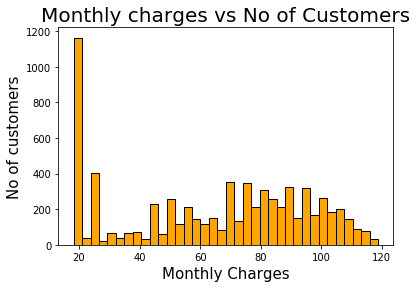

In [24]:
#INSIGHTS:
plt.hist(df.MonthlyCharges,bins=36,edgecolor='black',color='orange')
plt.title('Monthly charges vs No of Customers',fontsize=20)
plt.xlabel('Monthly Charges',fontsize=15)
plt.ylabel('No of customers',fontsize=15)
#From the below graph we can conclude that a lot of customers have been with the telecom company for just a month, 
#while quite a many are there for about 72 months.
plt.show()

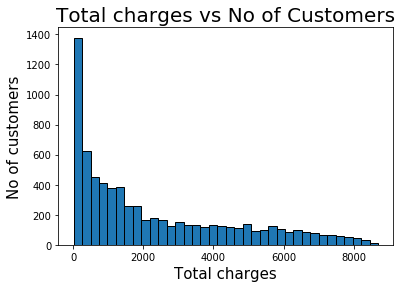

In [57]:
#INSIGHTS:
plt.hist(df.TotalCharges,bins=36,edgecolor='black')
plt.title('Total charges vs No of Customers',fontsize=20)
plt.xlabel('Total charges',fontsize=15)
plt.ylabel('No of customers',fontsize=15)
#From the below graph we can conclude that a lot of customers have been with the telecom company for just a month, 
#while quite a many are there for about 72 months.
plt.show()

[5901, 1142]


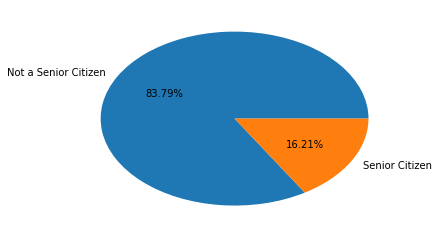

In [15]:
SenCit=[0,0]
for r,i in df.SeniorCitizen.iteritems():
    if i == 0:
        SenCit[0]+=1
    else:
        SenCit[1]+=1
print(SenCit)
labels = ['Not a Senior Citizen','Senior Citizen']
plt.pie(SenCit,labels = labels,autopct='%1.2f%%')
plt.show()

[3488, 3555]


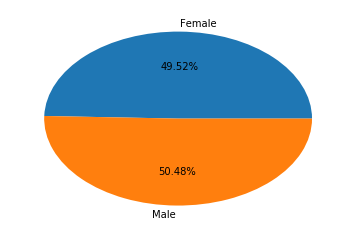

In [16]:
Gen=[0,0]
for r,i in df.gender.iteritems():
    if i == "Female":
        Gen[0]+=1
    else:
        Gen[1]+=1
print(Gen)
labels = ['Female','Male']
plt.pie(Gen,labels = labels,autopct='%1.2f%%')
plt.show()

[682, 6361]


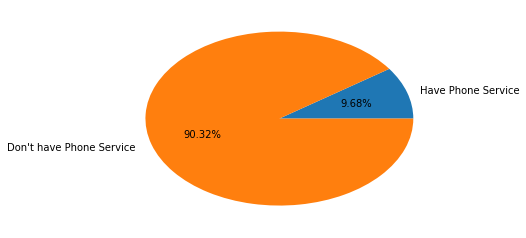

In [17]:
phone=[0,0]
for r,i in df.PhoneService.iteritems():
    if i == "No":
        phone[0]+=1
    else:
        phone[1]+=1
print(phone)
labels = ['Have Phone Service','Don\'t have Phone Service ']
plt.pie(phone,labels = labels,autopct='%1.2f%%')
plt.show()

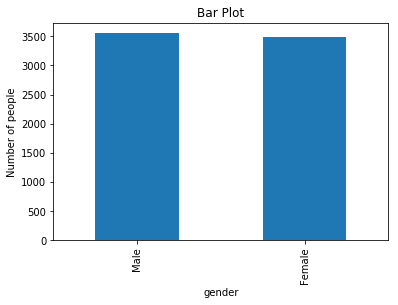

In [18]:
df.gender.value_counts().plot(kind="bar")
plt.xlabel('gender')
plt.ylabel('Number of people')
plt.title('Bar Plot')
plt.show()

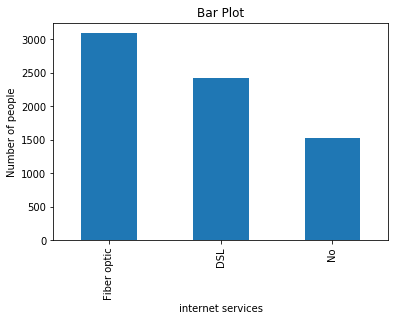

In [19]:
df.InternetService.value_counts().plot(kind="bar")
plt.xlabel('internet services')
plt.ylabel('Number of people')
plt.title('Bar Plot')
plt.show()

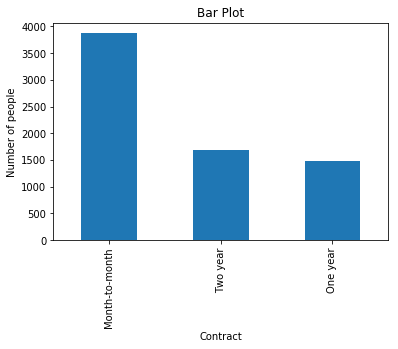

In [20]:
df.Contract.value_counts().plot(kind="bar")
plt.xlabel('Contract')
plt.ylabel('Number of people')
plt.title('Bar Plot')
plt.show()

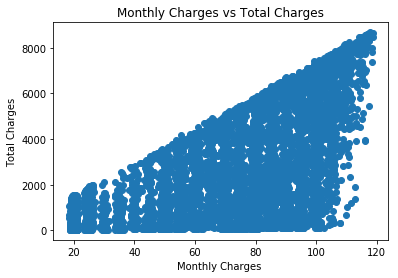

In [21]:
plt.scatter(df.MonthlyCharges, df.TotalCharges)#positive correlated
plt.xlabel('Monthly Charges ')
plt.ylabel('Total Charges')
plt.title('Monthly Charges vs Total Charges')
plt.show()

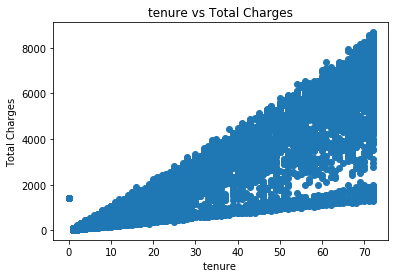

In [22]:
plt.scatter(df.tenure, df.TotalCharges)
plt.xlabel('tenure ')
plt.ylabel('Total Charges')
plt.title('tenure vs Total Charges')
plt.show()

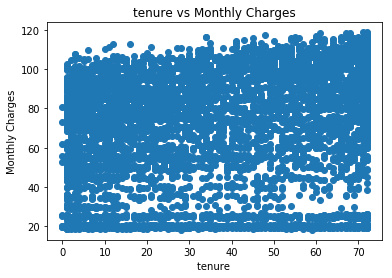

In [23]:
plt.scatter(df.tenure, df.MonthlyCharges)
plt.xlabel('tenure ')
plt.ylabel('Monthly Charges')
plt.title('tenure vs Monthly Charges')
plt.show()

Text(0.5,0,'Churn')

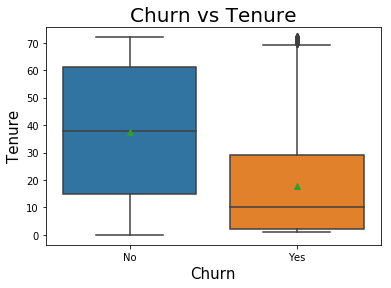

In [27]:
# Churn vs Tenure
ax = sns.boxplot(x='Churn', y = 'tenure', data=df,showmeans=True)
ax.set_title('Churn vs Tenure', fontsize=20)
ax.set_ylabel('Tenure', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
#From the below boxplot it is clearly evident that shorter is the tenure, higher is the possibility of churn

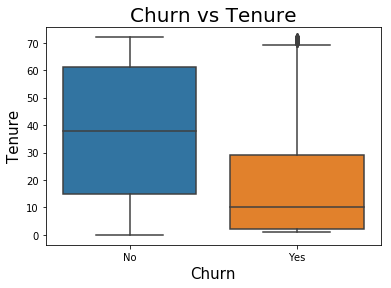

In [35]:
plt.show()

In [36]:
# Churn Percentage over 24 Months of Tenure
agg =df.replace('Yes', 1).replace('No', 0).groupby('tenure', as_index=False)[['Churn']].mean()
agg = agg[agg.tenure < 25]
agg['Churn'] = np.round(agg['Churn'], 2) * 100
plt.figure(figsize=(20,6))

ax = sns.barplot(x='tenure', y='Churn', data = agg)
ax.set_title('Churn Percentage Over 24 Months of Tenure', fontsize=20)
ax.set_ylabel('Percentage of Churn', fontsize = 15)
ax.set_xlabel('Tenure in Months', fontsize = 15)
#Over 60% of customers who complete one month of tenure Churn. 
#As the length of tenure increases Churn reduces to about 25 percent at 24 months. 

Text(0.5,0,'Tenure in Months')

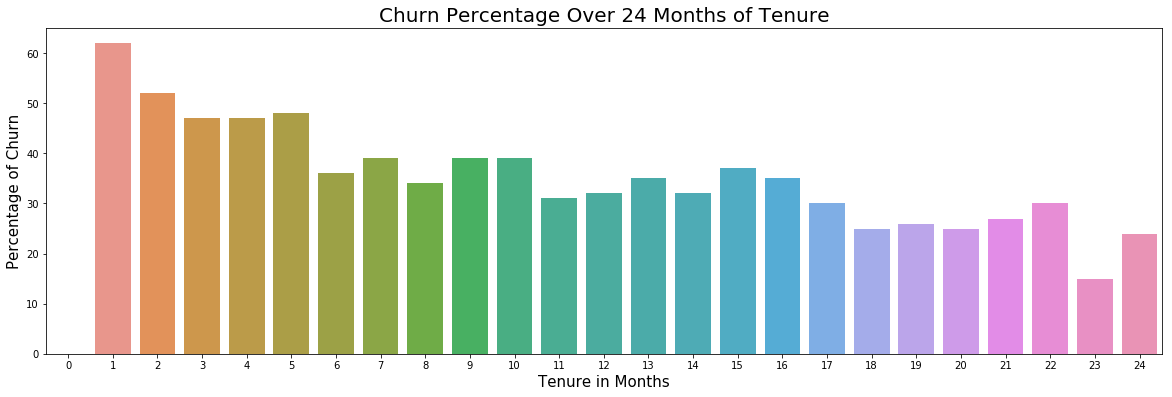

In [37]:
plt.show()

In [38]:
 Churn among Senior Citizens vs Non Senior Citizens
agg = df.replace('Yes', 1).replace('No', 0).groupby('SeniorCitizen', as_index=False)[['Churn']].sum()
agg.iloc[0,1] = round(agg.iloc[0,1]/df[df.SeniorCitizen==0].shape[0], 2) * 100
agg.iloc[1,1] = round(agg.iloc[1,1]/df[df.SeniorCitizen==1].shape[0], 2) * 100
plt.figure(figsize=(12,6))
ax = sns.barplot(x='SeniorCitizen', y ='Churn', data = agg)
ax.set_ylabel('Percentage of Churn', fontsize=15)
ax.set_xlabel('Senior Citizen', fontsize=15)

ax.set_title('Churn Among Senior Citizens vs Non Senior (Percentage)', fontsize=20)
#Senior Citizens are churning in greater proportion, almost 42% of Sr.Citizens churn compared to about 
#25% of non Senior Citizens

Text(0.5,1,'Churn Among Senior Citizens vs Non Senior (Percentage)')

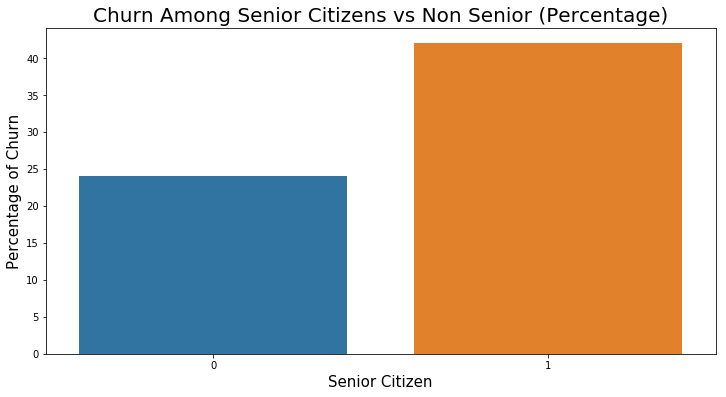

In [39]:
plt.show()

In [61]:
#Churn By Gender
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="gender", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)

ax.set_title('Churn By Gender', fontsize=20)
#Gender does not seem to influence Churn significantly

Text(0.5,1,'Churn By Gender')

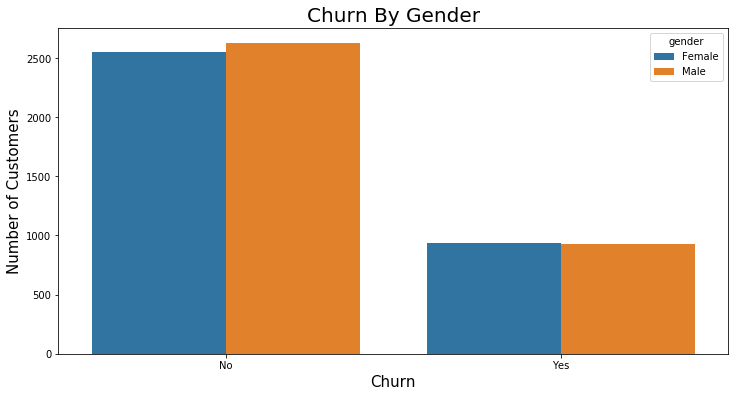

In [62]:
plt.show()

In [43]:
# 7) Churn By Internet Service Type
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="InternetService", data=df);
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn By Internet Service Type', fontsize=20)
#From below graph ,customers with Fiber Optic internet service are churning in high proportions


Text(0.5,1,'Churn By Internet Service Type')

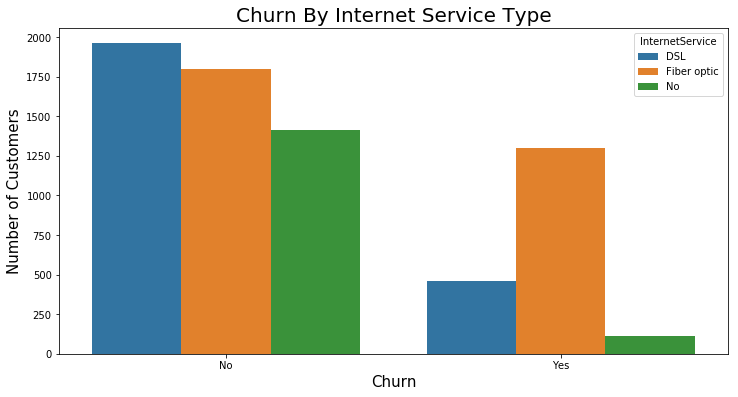

In [44]:
plt.show()

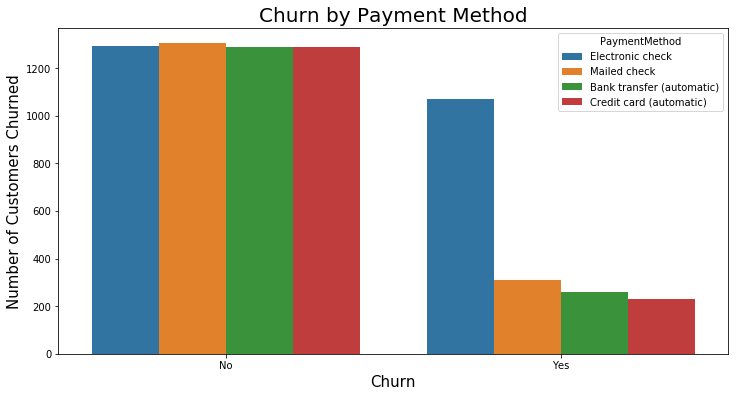

In [45]:
# 8) Churn by Payment Method
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="PaymentMethod", data=df);
ax.set_ylabel('Number of Customers Churned', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
ax.set_title('Churn by Payment Method', fontsize=20)
#From the graph ,Customers with Electronic Check as mode of payment are churning in higher proportion 
plt.show()

Text(0.5,1,'Churn by Contract Type')

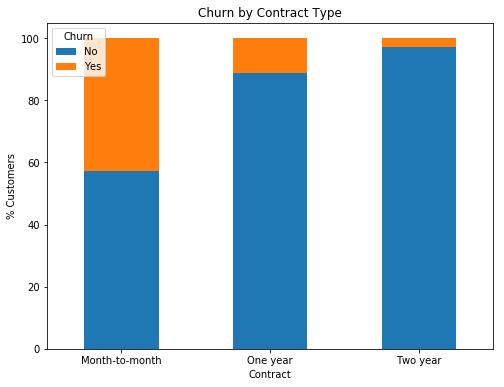

In [29]:
# 9) Churn By Contract Type
contract_churn = df.groupby(['Contract','Churn']).size().unstack()
ax = (contract_churn.T*100.0 / contract_churn.T.sum()).T.plot(kind='bar',stacked = True,rot = 0, figsize = (8,6))
ax.set_ylabel('% Customers')
ax.set_title('Churn by Contract Type')    
#The customers who have availed Month-to-Month Contract churn the most, while those of Two-Year seem to be loyal to the
#company.

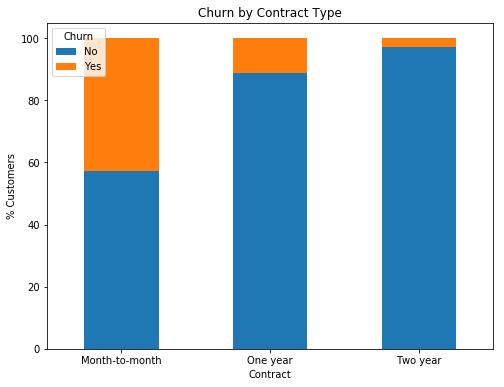

In [47]:
plt.show()

In [48]:
# 10)Distribution of monthly charges by churn using KDE plots 
#In statistics, kernel density estimation(KDE) is a non-parametric way to estimate the 
#probability density function of a random variable.
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'No') ],
                color="Red", shade = True)
ax = sns.kdeplot(df.MonthlyCharges[(df["Churn"] == 'Yes') ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

# Higher % of customers churn when the monthly charges are high.

Text(0.5,1,'Distribution of monthly charges by churn')

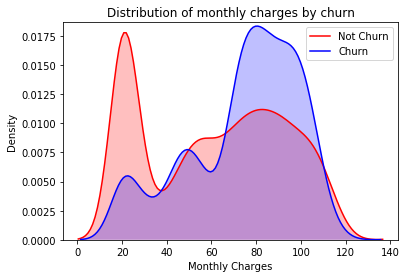

In [49]:
plt.show()

In [50]:
#Services vs CHURN
telecom_churn_services = df[['OnlineSecurity', 'DeviceProtection', 'StreamingMovies'
                                       ,'TechSupport', 'StreamingTV', 'OnlineBackup', 'Churn']]
telecom_churn_services.replace(to_replace='Yes', value=1, inplace=True)
telecom_churn_services.replace(to_replace='No', value=0, inplace=True)
telecom_churn_services = telecom_churn_services[telecom_churn_services.OnlineSecurity !='No internet service']             
agg = telecom_churn_services.groupby('Churn', as_index=False)[['OnlineSecurity', 'DeviceProtection', 
                                                               'StreamingMovies', 'TechSupport', 'StreamingTV', 'OnlineBackup']].sum()
ax = agg.set_index('Churn').T.plot(kind='bar', stacked=True,rot=0, figsize=(10,6))
ax.set_title('Services vs Churn', fontsize=20)
ax.set_xlabel('Services provided by company', fontsize = 15)
ax.set_ylabel('No of Customers', fontsize = 15)
#From the below visualisation we can conclude that the customers who have availed Streaming TV and Streaming Movies 
#services from the company are churning at a greater proportion when compared to others.

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


Text(0,0.5,'No of Customers')

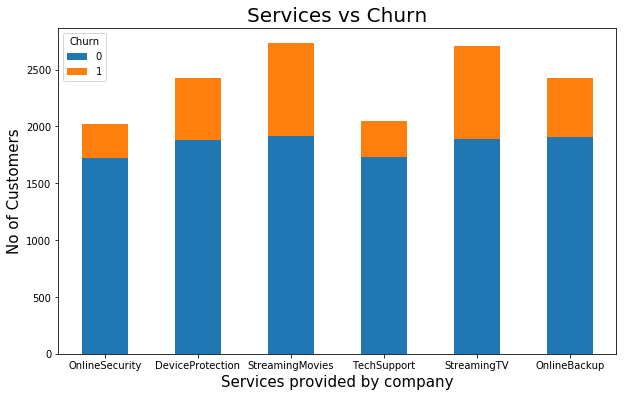

In [51]:
plt.show()

In [52]:
#Multiple lines vs Churn
plt.figure(figsize=(12,6))
ax = sns.countplot(x="Churn", hue="MultipleLines", data=df);
ax.set_title('Multiple Lines vs Churn', fontsize=20)
ax.set_ylabel('Number of Customers', fontsize = 15)
ax.set_xlabel('Churn', fontsize = 15)
# From this we can observe that the customers who do not have phone service churn the least, while those with or without
#multiple lines churn almost at equal rate which implies that the multiple lines factor does NOT influence churn rate.

Text(0.5,0,'Churn')

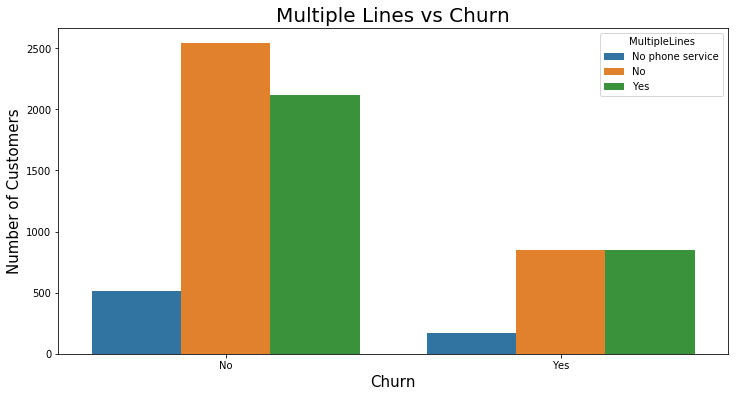

In [53]:
plt.show()

In [54]:
tech=(df['TechSupport'].value_counts()).plot(kind='bar',rot=0,stacked = True)
tech.set_xlabel('TECH SUPPORT')
tech.set_ylabel('NO OF CUSTOMERS')
tech.set_title('Tech Support vs Churn', fontsize=20)
#From the graph, we can observe that the people with tech support churn the least while those without tech support 
#churn the most.

Text(0.5,1,'Tech Support vs Churn')

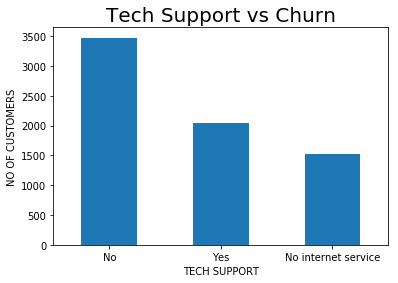

In [55]:
plt.show()

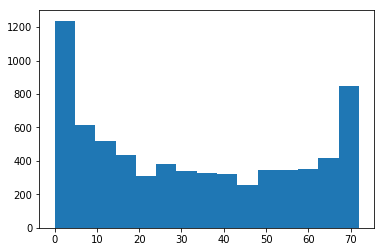

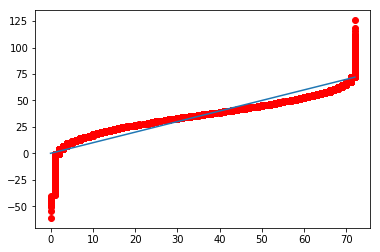

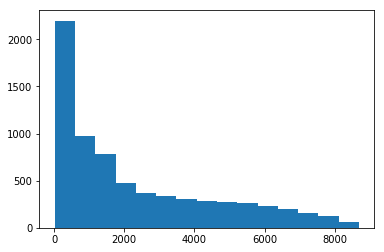

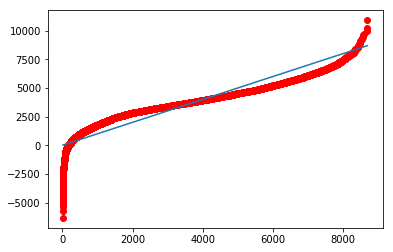

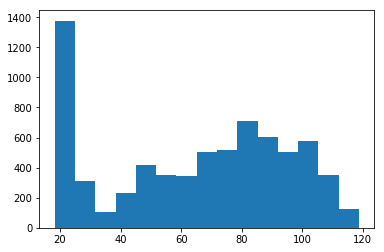

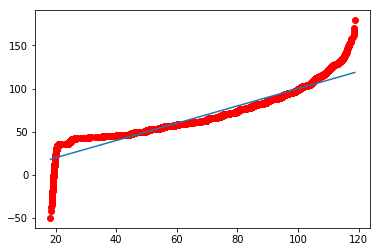

In [58]:
z=[]
z1=[]
z2=[]
for r,i in df.tenure.iteritems():
    z.append(i)
for r,i in df.TotalCharges.iteritems():
    z1.append(i)
for r,i in df.MonthlyCharges.iteritems():
    z2.append(i)
def normality_check(data):
    pos =[]
    th_Q =[]
    data = np.sort(np.array(data))
    pos = [(i - 0.5)/len(data) for i in range(1, len(data)+1)]
    th_Q = [norm.ppf(i, np.mean(data), np.std(data, ddof = 1)) for i in pos]
    plt.plot(data, th_Q, 'ro', data, data)
    
    plt.show()

#normality_check(z)
#normality_check(z1)
#normality_check(z2)
#df = pd.read_csv('PM_data_table1-2.csv')
plt.hist(df.tenure, bins = 15)
plt.show()
normality_check(df.tenure)
plt.hist(df.TotalCharges, bins = 15)
plt.show()
normality_check(df.TotalCharges)
plt.hist(df.MonthlyCharges, bins = 15)
plt.show()
normality_check(df.MonthlyCharges)